In [1]:
# importing relevant packages 

import torch 
from torchvision import models
import pandas as pd
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn 
import glob
import os
import cv2
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms
from torchsummary import summary
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import json

/home/dell/Desktop/xxxx/Uni/Kirigami_project/Keypoint_detection_notebooks/.Keypoint_detection_notebooks/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# for i in range(17):
#     print('\'p'+str(i)+'_x\', ', end ='')
#     print('\'p'+str(i)+'_y\', ', end ='')

# for i in range(17):
#     print('p'+str(i)+'_x_arr = []')
#     print('p'+str(i)+'_y_arr = []')

In [4]:
header = ['image_name', 'p1_x', 'p1_y', 'p2_x', 'p2_y', 'p3_x', 'p3_y', 'p4_x', 'p4_y', 'p5_x', 'p5_y', 'p6_x', 'p6_y', 'p7_x', 'p7_y', 'p8_x', 'p8_y', 'p9_x', 'p9_y', 'p10_x', 'p10_y', 'p11_x', 'p11_y', 'p12_x', 'p12_y', 'p13_x', 'p13_y', 'p14_x', 'p14_y', 'p15_x', 'p15_y', 'p16_x', 'p16_y']
image_data = []
image_name_arr = []
p1_x_arr = []
p1_y_arr = []
p2_x_arr = []
p2_y_arr = []
p3_x_arr = []
p3_y_arr = []
p4_x_arr = []
p4_y_arr = []
p5_x_arr = []
p5_y_arr = []
p6_x_arr = []
p6_y_arr = []
p7_x_arr = []
p7_y_arr = []
p8_x_arr = []
p8_y_arr = []
p9_x_arr = []
p9_y_arr = []
p10_x_arr = []
p10_y_arr = []
p11_x_arr = []
p11_y_arr = []
p12_x_arr = []
p12_y_arr = []
p13_x_arr = []
p13_y_arr = []
p14_x_arr = []
p14_y_arr = []
p15_x_arr = []
p15_y_arr = []
p16_x_arr = []
p16_y_arr = []


with open('./Kirigami_dataset_4/Kirigami_dataset_4.json', 'r') as f:
    images = json.load(f)
    
    for image in images:
        print(image['data']['img'][-13:])
        image_name_arr.append(image['data']['img'][-13:])  # image_name
        p1_x_arr.append(image['annotations'][0]['result'][0]['value']['x'] / 100)
        p1_y_arr.append(image['annotations'][0]['result'][0]['value']['y'] / 100)
        p2_x_arr.append(image['annotations'][0]['result'][1]['value']['x'] / 100)
        p2_y_arr.append(image['annotations'][0]['result'][1]['value']['y'] / 100)
        p3_x_arr.append(image['annotations'][0]['result'][2]['value']['x'] / 100)
        p3_y_arr.append(image['annotations'][0]['result'][2]['value']['y'] / 100)
        p4_x_arr.append(image['annotations'][0]['result'][3]['value']['x'] / 100)
        p4_y_arr.append(image['annotations'][0]['result'][3]['value']['y'] / 100)
        p5_x_arr.append(image['annotations'][0]['result'][4]['value']['x'] / 100)
        p5_y_arr.append(image['annotations'][0]['result'][4]['value']['y'] / 100)
        p6_x_arr.append(image['annotations'][0]['result'][5]['value']['x'] / 100)
        p6_y_arr.append(image['annotations'][0]['result'][5]['value']['y'] / 100)
        p7_x_arr.append(image['annotations'][0]['result'][6]['value']['x'] / 100)
        p7_y_arr.append(image['annotations'][0]['result'][6]['value']['y'] / 100)
        p8_x_arr.append(image['annotations'][0]['result'][7]['value']['x'] / 100)
        p8_y_arr.append(image['annotations'][0]['result'][7]['value']['y'] / 100)
        p9_x_arr.append(image['annotations'][0]['result'][8]['value']['x'] / 100)
        p9_y_arr.append(image['annotations'][0]['result'][8]['value']['y'] / 100)
        p10_x_arr.append(image['annotations'][0]['result'][9]['value']['x'] / 100)
        p10_y_arr.append(image['annotations'][0]['result'][9]['value']['y'] / 100)
        p11_x_arr.append(image['annotations'][0]['result'][10]['value']['x'] / 100)
        p11_y_arr.append(image['annotations'][0]['result'][10]['value']['y'] / 100)
        p12_x_arr.append(image['annotations'][0]['result'][11]['value']['x'] / 100)
        p12_y_arr.append(image['annotations'][0]['result'][11]['value']['y'] / 100)
        p13_x_arr.append(image['annotations'][0]['result'][12]['value']['x'] / 100)
        p13_y_arr.append(image['annotations'][0]['result'][12]['value']['y'] / 100)
        p14_x_arr.append(image['annotations'][0]['result'][13]['value']['x'] / 100)
        p14_y_arr.append(image['annotations'][0]['result'][13]['value']['y'] / 100)
        p15_x_arr.append(image['annotations'][0]['result'][14]['value']['x'] / 100)
        p15_y_arr.append(image['annotations'][0]['result'][14]['value']['y'] / 100)
        p16_x_arr.append(image['annotations'][0]['result'][15]['value']['x'] / 100)
        p16_y_arr.append(image['annotations'][0]['result'][15]['value']['y'] / 100)     
        

image_data = pd.concat([pd.Series(image_name_arr), pd.Series(p1_x_arr), pd.Series(p1_y_arr), pd.Series(p2_x_arr), pd.Series(p2_y_arr), pd.Series(p3_x_arr), pd.Series(p3_y_arr), pd.Series(p4_x_arr), pd.Series(p4_y_arr), pd.Series(p5_x_arr), pd.Series(p5_y_arr), pd.Series(p6_x_arr), pd.Series(p6_y_arr), pd.Series(p7_x_arr), pd.Series(p7_y_arr), pd.Series(p8_x_arr), pd.Series(p8_y_arr), pd.Series(p9_x_arr), pd.Series(p9_y_arr), pd.Series(p10_x_arr), pd.Series(p10_y_arr), pd.Series(p11_x_arr), pd.Series(p11_y_arr), pd.Series(p12_x_arr), pd.Series(p12_y_arr), pd.Series(p13_x_arr), pd.Series(p13_y_arr), pd.Series(p14_x_arr), pd.Series(p14_y_arr), pd.Series(p15_x_arr), pd.Series(p15_y_arr), pd.Series(p16_x_arr), pd.Series(p16_y_arr)], axis=1, keys=header)
print(image_data.shape)
print(image_data.head(3))
print(image_data.iloc[10])


image0240.jpg
image0241.jpg
image0242.jpg
image0243.jpg
image0244.jpg
image0245.jpg
image0246.jpg
image0247.jpg
image0248.jpg
image0249.jpg
image0250.jpg
image0251.jpg
image0252.jpg
image0253.jpg
image0254.jpg
image0255.jpg
image0256.jpg
image0257.jpg
image0258.jpg
image0259.jpg
image0260.jpg
image0261.jpg
image0262.jpg
image0263.jpg
image0264.jpg
image0265.jpg
image0266.jpg
image0267.jpg
image0268.jpg
image0269.jpg
image0270.jpg
image0271.jpg
image0272.jpg
image0273.jpg
image0274.jpg
image0275.jpg
image0276.jpg
image0277.jpg
image0278.jpg
image0279.jpg
image0280.jpg
image0281.jpg
image0282.jpg
image0283.jpg
image0284.jpg
image0285.jpg
image0286.jpg
image0287.jpg
image0288.jpg
image0289.jpg
image0290.jpg
image0291.jpg
image0292.jpg
image0293.jpg
image0294.jpg
image0295.jpg
image0296.jpg
image0297.jpg
image0298.jpg
image0299.jpg
image0300.jpg
image0301.jpg
image0302.jpg
image0303.jpg
image0304.jpg
image0305.jpg
image0306.jpg
image0307.jpg
image0308.jpg
image0309.jpg
image0310.jpg
image0

In [5]:
# image_data.to_csv('./Kirigami_dataset_3/Kirigami_dataset_3.csv', index=False)
image_data.to_csv('./Kirigami_dataset_4/Kirigami_dataset_4.csv', index=False)

In [6]:
import random
import albumentations as A

In [7]:
# Define a function to visualize keypoints on an image

KEYPOINT_COLOR = (0, 255, 0) # Green

def vis_keypoints(image, keypoints, color=KEYPOINT_COLOR, diameter=15):
    image = image.copy()

    for (x, y) in keypoints:
        cv2.circle(image, (int(x), int(y)), diameter, (0, 255, 0), -1)
        
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)

In [8]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_4')

test_image = cv2.imread(os.path.join(images_dir, image_data.iloc[11]['image_name']))
x_points = image_data.iloc[11][1:][::2]*test_image.shape[1]
y_points = image_data.iloc[11][2:][::2]*test_image.shape[0]




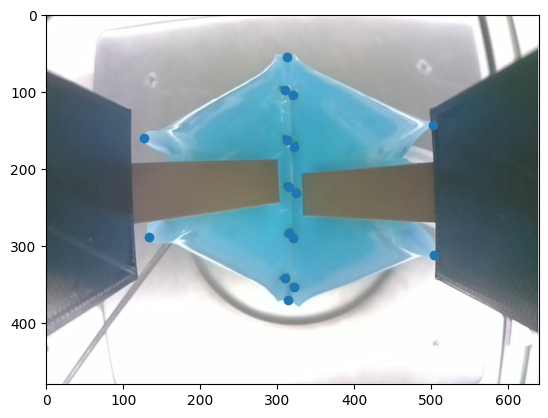

In [9]:
plt.imshow(test_image)
list(zip(x_points,y_points))
plt.scatter(x_points, y_points)

In [ ]:
test_keypoints = list(zip(x_points,y_points))

In [ ]:
test_keypoints

In [ ]:
vis_keypoints(test_image, test_keypoints, color=KEYPOINT_COLOR, diameter=15)

In [ ]:
transform = A.Compose([
    A.Affine(scale=2,p=1)
#     A.RandomCrop(width=1330, height=1130),
#     A.RandomBrightnessContrast(p=1),
], keypoint_params=A.KeypointParams(format='xy'))

In [ ]:
transformed = transform(image=test_image, keypoints=test_keypoints)
transformed_image = transformed['image']
transformed_keypoints = transformed['keypoints']

In [ ]:
vis_keypoints(transformed_image, transformed_keypoints, color=KEYPOINT_COLOR, diameter=15)

In [ ]:
transformed_keypoints

In [ ]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_1')

In [ ]:
image_data.iloc[0]['image_name']

In [ ]:
img_arr = cv2.imread(os.path.join(images_dir, image_data.iloc[0]['image_name']))

In [ ]:
img_arr.shape

In [ ]:
# img = cv2.resize(img_arr, (224,224))
# img_tensor = transforms.ToTensor()(img)
# print(img_tensor.shape)
# img_mean = img_tensor.mean(dim = (1,2))
# img_std = img_tensor.std(dim = (1,2))

In [ ]:
plt.imshow(img_arr)
x_points = image_data.iloc[0][1:][::2]
y_points = image_data.iloc[0][2:][::2]
x_width = img_arr.shape[1]
y_height = img_arr.shape[0]

plt.scatter(x_points*x_width, y_points*y_height)

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, df, img_dir):
        self.df = df
        self.img_dir = img_dir
        
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        image = cv2.imread(img_path)
        label = self.df.iloc[idx, 1:]
        image = self.transform_image(image)
        return image.to(device), torch.tensor(label).to(device)
    
    def __len__(self):
        return self.df.shape[0]
    
    def transform_image(self, img):
        img = cv2.resize(img, (224,224))
        img_tensor = transforms.ToTensor()(img)
        img_mean = img_tensor.mean(dim = (1,2))
        img_std = img_tensor.std(dim = (1,2))
        
        img_normalised = transforms.Normalize(img_mean, img_std)(img_tensor)
        return img_normalised
    
    def load_img(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        img = cv2.imread(img_path)
        return img
    

In [ ]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_1')
print(images_dir)

In [ ]:
train_df, test_df = train_test_split(image_data, test_size=0.04)

In [ ]:
print(train_df.shape)
print(test_df.shape)

In [ ]:
train_dataset = ImageDataset(train_df, images_dir)
test_dataset = ImageDataset(test_df, images_dir)

In [ ]:
img = test_dataset.load_img(0)
plt.imshow(img)

In [ ]:
img_tensor, labels = train_dataset[0]

In [ ]:
labels

In [ ]:
img_tensor

In [ ]:
img_np = img_tensor.cpu().numpy()
img_np

In [ ]:
print(img_np.shape)
img_np_reverted = np.transpose(img_np, (1,2,0))
print(img_np_reverted.shape)
plt.imshow(img_np_reverted, clim=(-1, 1))

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

In [ ]:
for img, points in train_dataloader:
  print(img.shape)
  print(points.shape)
  break